### Chapter 2 – End-to-end Machine Learning project

This notebook contains all the sample code and solutions to the exercises in chapter 2.

In [1]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


In [2]:
# This project requires Python 3.7 or above:

import sys

assert sys.version_info >= (3, 7)

In [3]:
# It also requires Scikit-Learn ≥ 1.0.1:

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### Get the Data
- Welcome to Machine Learning Housing Corp.! 
- Your task is to predict median house values in Californian districts, given a number of features from these districts.

### Download the Data

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

这段代码定义了一个名为 `load_housing_data` 的函数，旨在从一个在线源下载和提取一个名为 `housing.tgz` 的数据集，并最终以 Pandas DataFrame 的形式加载这个数据集。下面是详细解释：

1. **定义函数**:
   ```python
   def load_housing_data():
   ```
   这行代码定义了一个名为 `load_housing_data` 的函数，它不接受任何参数。

2. **设置压缩文件的路径**:
   ```python
   tarball_path = Path("datasets/housing.tgz")
   ```
   使用 `Path` 类（来自 Python 的 `pathlib` 模块）来创建一个 `Path` 对象，这个对象指向名为 `housing.tgz` 的文件。这个文件预期存放在 `datasets` 目录中。

3. **检查文件是否存在**:
   ```python
   if not tarball_path.is_file():
   ```
   如果 `housing.tgz` 文件不存在，以下代码块将被执行。

4. **创建目录**:
   ```python
   Path("datasets").mkdir(parents=True, exist_ok=True)
   ```
   如果 `datasets` 目录不存在，这行代码将创建它。`parents=True` 表示如果需要，将创建父目录；`exist_ok=True` 意味着如果目录已经存在，不会引发错误。

5. **下载数据集**:
   ```python
   url = "https://github.com/ageron/data/raw/main/housing.tgz"
   urllib.request.urlretrieve(url, tarball_path)
   ```
   从给定的 URL 下载 `housing.tgz` 文件，并将其保存在先前定义的 `tarball_path`。

6. **解压数据集**:
   ```python
   with tarfile.open(tarball_path) as housing_tarball:
       housing_tarball.extractall(path="datasets")
   ```
   使用 `tarfile` 模块打开下载的 `.tgz` 文件，并将其内容解压到 `datasets` 目录中。

7. **加载并返回数据**:
   ```python
   return pd.read_csv(Path("datasets/housing/housing.csv"))
   ```
   最后，函数使用 Pandas 的 `read_csv` 方法加载解压后的 `housing.csv` 文件，并返回这个文件的内容作为一个 DataFrame。这个 CSV 文件预期包含房屋数据集的数据。

总的来说，这个函数处理从在线源下载、解压并加载房屋数据集的整个流程，使得用户可以直接以 DataFrame 的形式使用这些数据。

### Take a Quick Look at the Data Structure

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


在 Python 中，特别是在使用 Pandas 库进行数据分析时，`describe()` 方法是一个非常有用的工具。当你看到 `housing.describe()` 这行代码时，它是对名为 `housing` 的 Pandas DataFrame 执行的操作。这个方法提供了该 DataFrame 中数值列的统计摘要。具体来说，它包含以下统计信息：

1. **count**: 显示每列的非空值数量。
2. **mean**: 计算每列的平均值。
3. **std**: 表示每列的标准偏差，这是数据分布的一个度量，描述数据点如何围绕平均值分布。
4. **min**: 每列的最小值。
5. **25% (第一四分位数)**: 这是每列的下四分位数，意味着 25% 的数据值低于或等于这个值。
6. **50% (中位数)**: 每列的中位数，即在数据集中排在中间的值。
7. **75% (第三四分位数)**: 这是每列的上四分位数，意味着 75% 的数据值低于或等于这个值。
8. **max**: 每列的最大值。

`housing.describe()` 的输出是一个新的 DataFrame，其中包含上述统计数据。这对于快速获取对数据集的概览，理解数据的分布、中心趋势和离散程度非常有用。例如，如果你在处理房地产数据，`housing.describe()` 可以快速告诉你价格、房屋大小、建造年份等特征的典型值、分布范围和变化程度。

In [9]:
# code to save the figures as high-res PNGs for the book
# 将图片保存为本书的高分辨率 PNG 文件

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

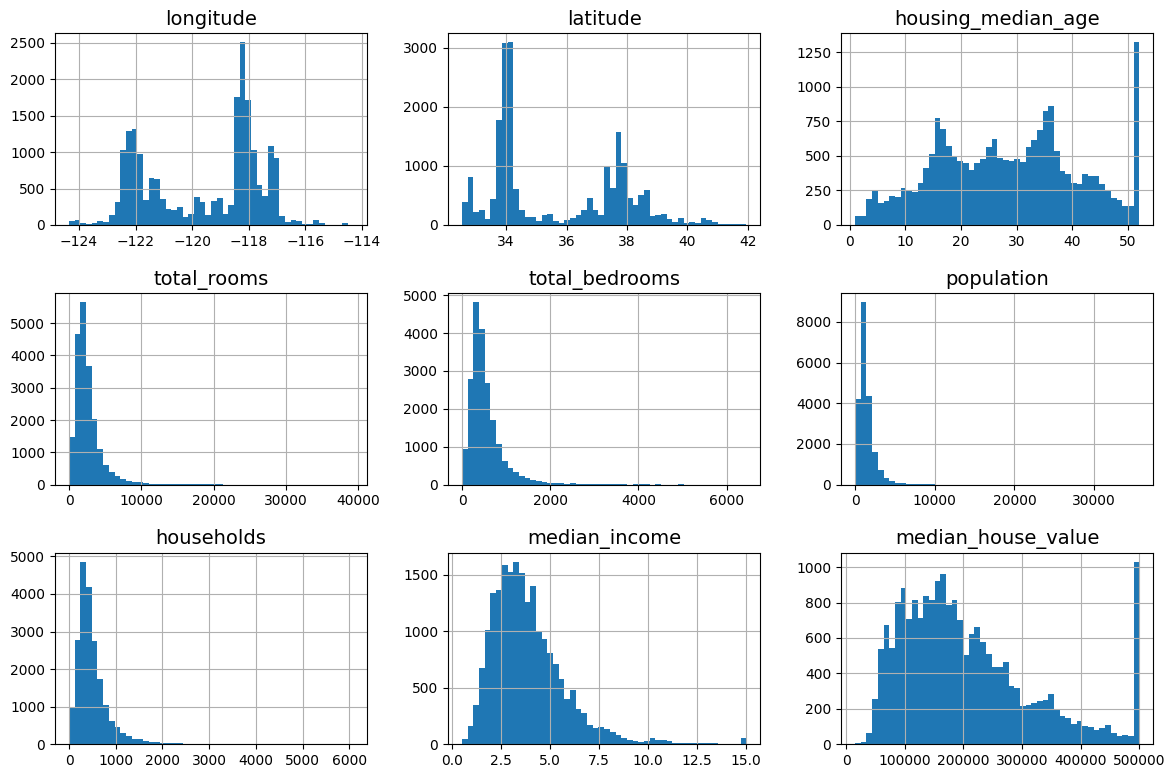

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

这段代码是用于创建图像存储目录并定义一个函数来保存绘制的图表。下面逐步解释这段代码的含义：

1. **设置图像存储路径**:
   ```python
   IMAGES_PATH = Path() / "images" / "end_to_end_project"
   ```
   这一行使用 `pathlib` 模块中的 `Path` 类来定义一个路径。这个路径指向当前目录下的 `images/end_to_end_project` 文件夹。`Path() / "images"` 是 `pathlib` 的路径拼接操作，它创建了一个指向 `images` 文件夹的路径，然后再进一步拼接到 `end_to_end_project` 子文件夹。

2. **创建图像存储目录**:
   ```python
   IMAGES_PATH.mkdir(parents=True, exist_ok=True)
   ```
   这一行代码确保了 `IMAGES_PATH` 指向的目录存在。如果该目录不存在，它将被创建。`parents=True` 参数意味着如果父目录不存在，也会一并创建它们。`exist_ok=True` 意味着如果目录已经存在，不会抛出异常。

3. **定义保存图表的函数**:
   ```python
   def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
       path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
       if tight_layout:
           plt.tight_layout()
       plt.savefig(path, format=fig_extension, dpi=resolution)
   ```
   这段代码定义了一个名为 `save_fig` 的函数，用于保存绘制的图表。函数参数解释如下：
   - `fig_id`: 用于创建文件名。
   - `tight_layout`: 如果为 True，则使用 `plt.tight_layout()` 调整图表布局。
   - `fig_extension`: 图像的文件格式，默认为 "png"。
   - `resolution`: 图像的分辨率，以 DPI（每英寸点数）为单位。

   函数内部的逻辑是根据这些参数生成图像文件的完整路径，然后根据指定的布局、格式和分辨率将图表保存到这个路径。这是数据分析和数据可视化中常见的做法，用于保存生成的图表以便于报告或进一步分析。

### Create a Test Set

In [11]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

这段代码定义了一个名为 `shuffle_and_split_data` 的函数，它的目的是随机打乱并分割一个数据集为训练集和测试集。以下是每部分代码的详细解释：

1. **导入 NumPy 库**:
   ```python
   import numpy as np
   ```
   这行代码导入了 NumPy 库，一个在 Python 数据科学和数值计算中广泛使用的库。NumPy 提供了高性能的多维数组对象和工具，用于处理这些数组。

2. **定义函数**:
   ```python
   def shuffle_and_split_data(data, test_ratio):
   ```
   这定义了一个名为 `shuffle_and_split_data` 的函数，它接收两个参数：`data`（数据集）和 `test_ratio`（测试集占总数据集的比例）。

3. **随机打乱索引**:
   ```python
   shuffled_indices = np.random.permutation(len(data))
   ```
   这行代码使用 `np.random.permutation` 函数创建一个随机排列的索引数组。数组的长度与 `data` 的长度相同。这样，每个索引在数组中的位置都被随机化了。

4. **计算测试集大小**:
   ```python
   test_set_size = int(len(data) * test_ratio)
   ```
   根据提供的 `test_ratio`，计算出测试集应该有多大。`len(data)` 给出了数据集中的元素总数，乘以 `test_ratio` 后得到测试集的大小。

5. **分配测试集和训练集索引**:
   ```python
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   ```
   这两行代码分别划分出测试集和训练集的索引。测试集索引是 `shuffled_indices` 数组的前 `test_set_size` 个元素，而训练集索引是剩余的元素。

6. **返回训练集和测试集**:
   ```python
   return data.iloc[train_indices], data.iloc[test_indices]
   ```
   最后，函数返回两个数据集：使用 `.iloc` 基于索引划分的训练集和测试集。这里，`data.iloc[train_indices]` 和 `data.iloc[test_indices]` 分别用于从原始数据集中提取训练集和测试集。

这个函数是用于数据预处理的常见步骤之一，它确保了数据集被随机分割成训练集和测试集，这对于避免机器学习模型的过拟合和评估其泛化能力是非常重要的。

In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [13]:
len(test_set)

4128

为了确保每次运行此notebook的输出保持相同，我们需要设置随机种子：

In [14]:
np.random.seed(42)

遗憾的是，这并不能保证该notebook会输出与书中完全相同的结果，因为还有其他可能的变化来源。    
最重要的是，随着库的发展，算法会随着时间的推移而进行调整。      
希望大多数输出应该是相同的，或者至少在正确的范围内。

In [15]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

这段代码实现了一个使用哈希函数来分割数据集为训练集和测试集的方法。这个方法的特点是它提供了一种一致性的方式来决定哪些数据点应该被放入测试集，这对于确保在多次运行过程中测试集保持不变特别有用。下面是代码的详细解释：

1. **导入 `crc32` 函数**:
   ```python
   from zlib import crc32
   ```
   这行代码从 Python 的 `zlib` 模块中导入了 `crc32` 函数。`crc32` 用于计算数据的循环冗余校验值（CRC），这是一种常用的哈希函数。

2. **定义 `is_id_in_test_set` 函数**:
   ```python
   def is_id_in_test_set(identifier, test_ratio):
       return crc32(np.int64(identifier)) < test_ratio * 2**32
   ```
   这个函数用于判断给定的标识符（`identifier`）是否应该被放入测试集。它首先将标识符转换为 `np.int64` 类型（确保格式一致性），然后应用 `crc32` 哈希函数。如果计算出的哈希值小于 `test_ratio` 乘以 `2**32`（即32位最大整数），则函数返回 `True`，意味着该标识符对应的数据点应该在测试集中。

3. **定义 `split_data_with_id_hash` 函数**:
   ```python
   def split_data_with_id_hash(data, test_ratio, id_column):
       ids = data[id_column]
       in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
       return data.loc[~in_test_set], data.loc[in_test_set]
   ```
   这个函数用于实际分割数据集。它接受三个参数：数据集 `data`，测试集比例 `test_ratio`，以及用作唯一标识符的列 `id_column`。
   - 首先，从 `data` 中提取 `id_column` 指定的列，得到每个数据点的唯一标识符。
   - 然后，使用 `apply` 方法和之前定义的 `is_id_in_test_set` 函数来决定每个数据点是否应该在测试集中。
   - 最后，根据这些布尔值，使用 `loc` 方法从 `data` 中提取出训练集和测试集，并将它们返回。

这个方法的关键在于它使用哈希函数（在这里是 CRC32）来确保数据分割的一致性。这意味着即使在不同的运行中，只要输入数据和 `test_ratio` 保持不变，相同的数据点总是会被分配到相同的集合（训练集或测试集）中。这对于机器学习实验的重现性非常重要。

In [16]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
test_set["total_bedrooms"].isnull().sum()

44

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [20]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)


0.10736798530929942


这段代码使用二项分布来计算在给定的样本大小和比例下，得到特定数量的女性的概率。具体来说，它计算了在一个样本中女性比例偏离某个特定范围的概率。下面是代码的详细解释：

1. **从 `scipy.stats` 导入 `binom`**:
   ```python
   from scipy.stats import binom
   ```
   这行代码导入了 `scipy.stats` 模块中的 `binom` 类，它用于表示二项分布。

2. **设置样本大小和女性比例**:
   ```python
   sample_size = 1000
   ratio_female = 0.511
   ```
   这里定义了样本的总大小（1000）和样本中女性的比例（51.1%）。

3. **计算女性数量偏少的概率**:
   ```python
   proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
   ```
   这行代码计算在这个样本大小和女性比例下，得到少于485名女性（即484名或更少）的概率。`binom(sample_size, ratio_female).cdf(485 - 1)` 使用二项分布的累积分布函数（CDF）来计算这个概率。

4. **计算女性数量偏多的概率**:
   ```python
   proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
   ```
   类似地，这行代码计算得到超过535名女性的概率。这是通过计算得到535名或更少女性的概率，然后从1中减去这个值来得到的。

5. **输出两种情况的总概率**:
   ```python
   print(proba_too_small + proba_too_large)
   ```
   最后，代码将这两种情况（女性数量过少和过多）的概率相加，并打印出来。这个总概率表示了样本中女性数量显著偏离预期比例的情况发生的概率。

这段代码用于计算在假定女性占比为51.1%的情况下，一个大小为1000的样本中女性数量显著偏离485至535这个范围的概率。这种计算在统计分析中非常常见，特别是在进行假设检验或估计样本代表性的时候。

If you prefer simulations over maths, here's how you could get roughly the same result:

In [21]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [22]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

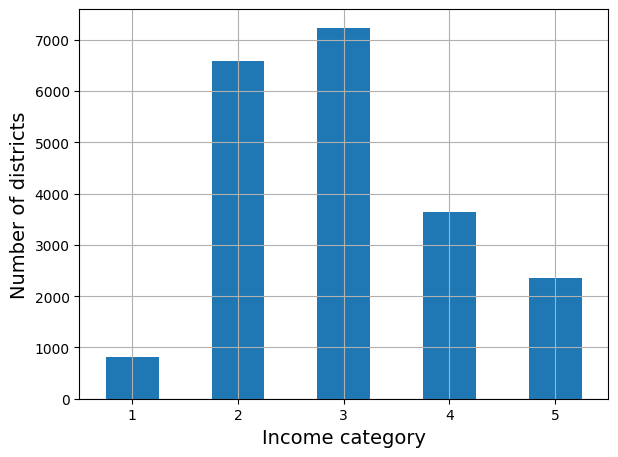

In [23]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

这段代码使用了 Scikit-Learn 的 `StratifiedShuffleSplit` 类来创建一个分层随机抽样的分割器，用于将数据集分割为训练集和测试集。这种分割方式尤其适用于确保训练集和测试集在某个关键特征上具有相似的分布。以下是对代码的详细解释：

1. **导入 `StratifiedShuffleSplit`**:
   ```python
   from sklearn.model_selection import StratifiedShuffleSplit
   ```
   这行代码从 Scikit-Learn 的 `model_selection` 模块中导入了 `StratifiedShuffleSplit` 类。

2. **创建分层随机分割器**:
   ```python
   splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
   ```
   这里，一个 `StratifiedShuffleSplit` 实例被创建，指定了分割次数（`n_splits=10`），测试集的大小（占总数据的 20%），以及随机种子（`random_state=42` 以保证可重复性）。

3. **进行分层随机分割**:
   ```python
   strat_splits = []
   for train_index, test_index in splitter.split(housing, housing["income_cat"]):
       strat_train_set_n = housing.iloc[train_index]
       strat_test_set_n = housing.iloc[test_index]
       strat_splits.append([strat_train_set_n, strat_test_set_n])
   ```
   这段代码执行实际的分割操作。`splitter.split` 方法接收两个参数：要分割的数据集（`housing`）和用于分层的特征列（在这个例子中是 `housing["income_cat"]`）。这个方法返回一系列索引对，每对索引分别代表训练集和测试集。

   - 对于每一对索引，使用 `iloc` 方法从 `housing` 数据集中提取对应的训练集和测试集。
   - 提取的训练集和测试集被添加到 `strat_splits` 列表中。

这种方法的优势在于它保证了测试集在某个关键特征（在此例中为 `income_cat`）上的分布与整个数据集的分布一致。这对于评估机器学习模型特别重要，因为它确保测试数据能够代表性地反映整个数据集，从而使得模型评估结果更为准确和可靠。

In [26]:
strat_train_set, strat_test_set = strat_splits[0]

获得单个分层分割的时间要短得多：

In [27]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [28]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [29]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

In [31]:
housing = strat_train_set.copy()

In [32]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


#### Visualizing Geographical Data

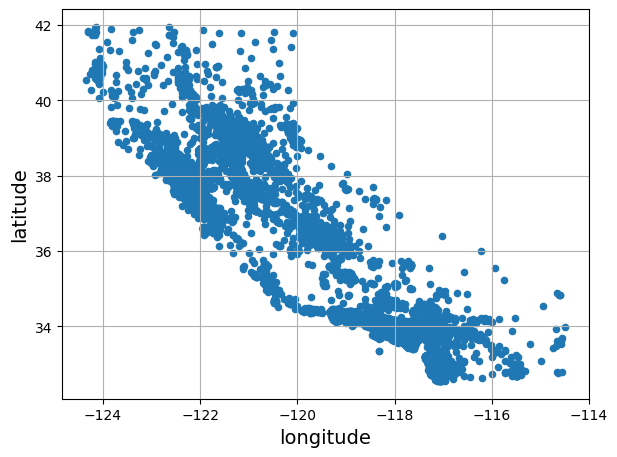

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

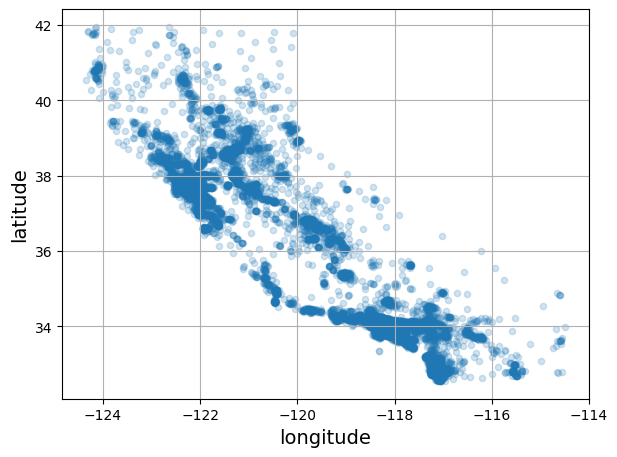

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

这段代码是用于绘制和展示数据的散点图，特别是用于地理数据。这里的代码是用Python的matplotlib库和pandas库结合使用的一个例子。下面是代码的详细解释：

1. `housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)`:
   - `housing`: 这是一个pandas的DataFrame，通常包含了数据集。
   - `.plot()`: 这是pandas的一个方法，用于绘制图表。
   - `kind="scatter"`: 指定绘制的图表类型为散点图。
   - `x="longitude"` 和 `y="latitude"`: 这里指定横坐标为经度（longitude）而纵坐标为纬度（latitude），用于绘制地理位置的数据点。
   - `grid=True`: 这个参数会在图表中添加网格线。
   - `alpha=0.2`: 这个参数设置了图表中点的透明度，0.2表示较为透明，这有助于在点较多时区分重叠区域。

2. `save_fig("better_visualization_plot")`: 这行代码看起来是一个自定义函数，用于保存图表。这个函数可能是在其他地方定义的，其功能通常是将当前绘制的图表保存到文件系统中。`"better_visualization_plot"`是保存的文件名。

3. `plt.show()`: 这行代码用于显示图表。在使用matplotlib绘制图表时，`plt.show()`用于在Python脚本或者交互式环境中弹出一个窗口，展示当前绘制的图表。

这段代码主要用于绘制一个散点图，展示了DataFrame中的地理位置数据，并且有一个额外的功能来保存这个图表。